<a href="https://colab.research.google.com/github/jtapiav/github-slideshow/blob/master/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos Géneticos

## Introducción

## Dependencias

In [12]:
# Dependencias
!pip install graph-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Bibliotecas

In [11]:
# Bibliotecas
import numpy as np
import math
import matplotlib.pyplot as plt

## Implementación

### Clase GeneticAlgorithm

In [110]:
class GeneticAlgorithm():
  def __init__( self, populationSize, chromosomeSize, 
               mutationType, crossoverType, selectionType, 
               functionDecode,
               calculateFitness,
               plotResult,
               epsilon, numberMaximumIterations,                
               randomState = 69, geneLimits = None ):
  
    np.random.seed( 69 )
    self.populationSize = populationSize
    self.chromosomeSize = chromosomeSize

    self.mutationType   = mutationType
    self.crossoverType  = crossoverType
    self.selectionType  = selectionType

    self.numberOfIteration = 0
    self.geneLimits        = geneLimits
    self.randomState       = randomState

    self.epsilon                 = epsilon
    self.numberMaximumIterations = numberMaximumIterations

    self.population              = None # 
    self.populationValue         = None #
    self.fitnessScores           = None #
    self.bestCandidateGeneration = None #

    self.functionDecode   = functionDecode
    #self.calculateFitness
    self.plotResult       = plotResult

    self.bestCandidateOfGeneration = []
    self.bestFitnessOfGeneration   = []    
    self.valueBestOfGeneration     = None

    
  def generateRandomPopulation( self ):
    return np.random.randint( 2, size=(self.populationSize, self.chromosomeSize ) )

  def bestCandidateSelection( self ):
    bestOfGenerationIndex = np.argmax( self.fitnessScores )
    return bestOfGenerationIndex

  def rankingSelection( self, numberOfElements ):
    sortedIndexes = np.argsort( -self.fitnessScores )
    selectedIndexes = sortedIndexes[:numberOfElements]
    return selectedIndexes
    
  def tournamentSelection( self, numberOfElements, numberOfCandidates ):
    candidatesIndexes = [np.random.randint( 0, len(self.fitnessScores), numberOfCandidates )]
    winnersIndexes = np.argmax( self.fitnessScores[candidatesIndexes]  )
    selectedIndexes = candidatesIndexes[np.arange(numberOfCandidates), winnersIndexes]
    return selectedIndexes

  def selection( self, numberOfElements, numberOfCandidates ):

    if self.selectionType not in [ 'ranking', 'tournament' ]:
      raise ValueError( 'Selection Type should be ranking or tournament' )

    if numberOfElements is None:
      raise ValueError( 'The number of elements must not be none if type ranking is selected')  

    if self.selectionType == 'ranking':
      indexesChromosome = self.rankingSelection( numberOfElements )

    elif self.selectionTypee == 'tournament':
      indexesChromosome = self.tournamentSelection( numberOfElements, numberOfCandidates )

    else: 
      pass

    self.population = self.population[indexesChromosome].copy()  


  def uniformCrossover( self, parent1, parent2 ):
      genePairs = list(zip(parent1, parent2))
      child1 = tuple( np.random.choice(gene) for gene in genePairs )
      child2 = tuple( np.random.choice(gene) for gene in genePairs )
      children = [ child1, child2 ]
      return children

  def onePointCrossover( self ):
      indexCut = np.random.choice( range( len(parent1) ) )
      child1 = parent1[:indexCut] + parent2[indexCut:]
      child2 = parent1[indexCut:] + parent2[:indexCut]
      children = [ child1, child2 ]
      return children

  def multiPointCrossover( self ):
    None    

  def crossover( self ):
    if self.crossoverType not in ['uniform', 'onePoint', 'multipoint']: 
      raise ValueError( 'Crossover Type should be uniform, one point or multi point' ) 

    parent1 = self.population[np.random.choice( len(self.population) )]
    parent2 = self.population[np.random.choice( len(self.population) )]
    
  
    if self.crossoverType == 'uniform':
      children = self.uniformCrossover( parent1, parent2 )

    elif self.crossoverType == 'onePoint':
      children = self.onePointCrossover()

    elif self.crossoverType == 'multiPoint':
      children = self.multiPointCrossover()

    else:
      pass

    self.population = np.concatenate([self.population, children])
        

  def mutation( self ): 
    if self.mutationType not in [ 'bitstring', 'shrink' ]:
      raise ValueError( 'Mutation Type should be one of bitstring or shrink' ) 

    indexRandomIndividual = np.random.choice( len(self.population) )
    randomIndividual = self.population[indexRandomIndividual]

    indexMutation = np.random.choice( len(randomIndividual) ) 
    individualModificable = list( randomIndividual )

    if self.mutationType == 'bitstring':
      individualModificable[indexMutation] = 1 - individualModificable[indexMutation]

    elif self.mutationType == 'shrink':
      individualModificable[indexMutation] = individualModificable[indexMutation] + np.random.rand()
      
    else:
      pass

    self.population[indexRandomIndividual] = tuple( individualModificable )  

  
  def printResult( self ):
    print( '=' * 80 )
    print( self.fitnessScores )
    print( f'Generation {self.numberOfIteration} max fitness {self.fitnessScores.max():0.4f} at ')
    for indexPopulation in range( len(self.population) ):
      print( f'#{indexPopulation+1}\t{self.population[indexPopulation]} fitness: {self.fitnessScores[indexPopulation]:0.4f} ' )
    print( f'Average fitness: {self.fitnessScores.mean():0.4f}' )  

    print( '=' * 80, '\n' ) 

  def calculateFitness( self ):
    return np.array( calculateFitness( self ) )
     
  def solve( self ):
    self.population = self.generateRandomPopulation()
    self.fitnessScores = self.calculateFitness()
    self.printResult()
    while self.numberOfIteration < self.numberMaximumIterations:    
      self.selection( 5, 2 )
      self.crossover()
      self.mutation()
      self.fitnessScores = self.calculateFitness()
      self.bestFitnessOfGeneration.append( self.fitnessScores[np.argmax(self.fitnessScores) ] )
      self.bestCandidateOfGeneration.append( self.population[np.argmax(self.fitnessScores) ] )
      self.numberOfIteration += 1


### Ejemplo de Optimización

#### Función de Fitness

In [4]:
def functionFitness( x ):
  return  - np.abs( np.sin(x) - 0.5 * x ) # Max in 1.89, 0.81

In [5]:
def calculateFitness( GA ):
  fitnessScores = np.zeros( len(GA.population) )
  n = self.chromosomeSize 
  a=1
  b=3
  x=[]
  for s in self.population:
    bin_to_int = np.array( [int(j) << i for i,j in enumerate(s[::-1])] ).sum()
    int_to_x   = a + bin_to_int * (b - a) / (2**n - 1)
    x.append( int_to_x )
  self.populationValue = np.array(x) 
  return fitnessScores

#### Plot

In [94]:
def plotResult( self ):
    xval = np.arange( 1, 3, 0.01 )
    yval = functionFitness( xval )
    plt.figure( figsize=(10,5) )

    plt.subplot( 141 )
    plt.plot( xval, yval, color='m', linewidth=4 )
    plt.scatter( xval, yval, color='m' )
    plt.xlim( (1,3) )
    plt.xlabel( '$x$' )
    plt.ylabel( '$f(x) = -|sin(x) - 0.5x|$' )
    plt.title( 'Population at Iteration ' + str(3) + '\n' + 'Number of Individuals: ' + str(self.populationSize) )

    xval = np.arange( 0, self.numberMaximumIterations, 1 )
    yval = self.bestFitnessOfGeneration

    plt.subplot( 142 )
    plt.plot( xval, yval, color='c', linewidth=4 )
    plt.xlim( 0 )
    plt.xlabel( 'Iteration' )
    plt.ylabel( 'Best Fitness' )
    plt.title( 'Best Fitness vs Iteration' + '\n' + 'number of Individuals: ' + str( self.populationSize ) )

    plt.subplot( 143 )
    plt.plot( self.bestFitnessOfGeneration, color='c', linewidth=4 )
    plt.xlim( 0 )
    plt.xlabel( 'Iteration' )
    plt.ylabel( 'Best Fitness' )
    plt.title( 'Best Fitness vs Iteration' + '\n' + 'number of Individuals: ' + str( self.populationSize ) )
  
    plt.subplot( 144 )
    plt.plot( self.bestFitnessOfGeneration, color='c', linewidth=4 )
    plt.xlim( 0 )
    plt.xlabel( 'Iteration' )
    plt.ylabel( 'Error' )
    plt.title( 'Best Fitness vs Iteration' + '\n' + 'number of Individuals: ' + str( self.populationSize ) )

    plt.tight_layout()
    plt.show()


Población inicial
Evaluar la población
Selección
Cruzamiento
Mutación
Evaluar la población
Terminación

#### Optimización

In [7]:
def functionDecode( self ):
  n = self.chromosomeSize 
  a=1
  b=3
  x=[]
  for s in self.population:
    bin_to_int = np.array( [int(j) << i for i,j in enumerate(s[::-1])] ).sum()
    int_to_x   = a + bin_to_int * (b - a) / (2**n - 1)
    x.append( int_to_x )
  self.populationValue = np.array(x)  
  return np.array(x)

GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
print( GA.bestCandidateOfGeneration[-1])
GA.plotResult( GA )


TypeError: ignored

Eureka Datarobot Programacion Genetica Regresion Simbolica

OCW Optimization




#### Resultados

# Grafos


## Dependencias

In [20]:
# Dependencias
!pip install graph-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Bibliotecas

In [19]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from time import time

## Pruebas Métodos

## Application Cores Graph

### Descripción

#### Nodos y Aristas

#### Matriz de adyacencia

#### Cromosoma

### Grafo

#### Grafo a Cromosoma

In [21]:
def mappingAdjacencyMatrixToChromosome( adjacencyMatrix ):
  triangularMatrixWithoutDiagonalIndices = np.triu_indices( n=adjacencyMatrix.shape[0], k=1 )
  triangularMatrixWithoutDiagonalValues = adjacencyMatrix[triangularMatrixWithoutDiagonalIndices]
  return np.array( triangularMatrixWithoutDiagonalValues )

#### Cromosoma a Cromosoma


In [22]:
def mappingChrosomeToAdjacencyMatrix( matrixSize, upperTriangularVector ):
  adjacencyMatrix = np.zeros( (matrixSize, matrixSize), dtype=int )
  upperTriangularIndex = 0

  for rowIndex in range( matrixSize ):
    for colIndex in range( rowIndex +  1, matrixSize ):
      adjacencyMatrix[rowIndex, colIndex] = upperTriangularVector[upperTriangularIndex]
      adjacencyMatrix[colIndex, rowIndex] = upperTriangularVector[upperTriangularIndex]
      upperTriangularIndex += 1

  return adjacencyMatrix 

#### Matrices

In [23]:
from numpy.random import triangular
def mappingAdjacencyMatrixToGraph( adjacencyMatrix ):
  return nx.DiGraph( adjacencyMatrix )



##### TDG

In [24]:
def create_tdg_matrix_mutated(adj_matrix, adj_matrixMutated, hop_matrixMutated, tdg_matrix ): 
  numberOfNodes = adj_matrixMutated.shape[0] 
  distanceMatrix = np.copy(adj_matrixMutated)
  distanceMatrix = distanceMatrix.astype(float)
  distanceMatrix[distanceMatrix == 0] = np.inf

  tdg_matrixMutated = np.copy(tdg_matrix)

  for i in range(numberOfNodes):
    for j in range(numberOfNodes):
      if adj_matrixMutated[i,j] == 1:
        tdg_matrixMutated[i,j] = tdg_matrix[i,j]
      else:
        tdg_matrixMutated[i,j] = 0

  tdg_matrixMutated = tdg_matrixMutated.astype(float)
  tdg_matrixMutated[tdg_matrixMutated == 0] = np.inf
  

  for k in range(numberOfNodes):
    for i in range(numberOfNodes):
      for j in range(numberOfNodes):
        if i != j:
          if distanceMatrix[i, j] > distanceMatrix[i, k] + distanceMatrix[k, j]:
            distanceMatrix[i, j] = distanceMatrix[i, k] + distanceMatrix[k, j]
            # Actualizar tdg_matrix si se encuentra una ruta más corta
            #tdg_matrixMutated[i, j] = tdg_matrixMutated[i, k] + tdg_matrixMutated[k, j]  + tdg_matrix[i,j]
            if np.abs( adj_matrix[i,j] - adj_matrixMutated[i, j] ) == 1:
              if(tdg_matrix[i,j] + tdg_matrixMutated[i, k] < tdg_matrix[i,j] + tdg_matrixMutated[k, j] ):
                tdg_matrixMutated[i,k] = tdg_matrix[i,j] + tdg_matrixMutated[i, k]
              else:
                tdg_matrixMutated[k,j] = tdg_matrix[i,j] + tdg_matrixMutated[k, j]

            print( [ tdg_matrix[i,j] + tdg_matrixMutated[i, k] , tdg_matrix[i,j] + tdg_matrixMutated[k, j], tdg_matrixMutated[k,j] ] )
            #tdg_matrix_updated[i, j] = tdg_matrix[i, j] #+ tdg_matrix[k, j]

  tdg_matrixMutated[tdg_matrixMutated == np.inf] = 0
  return tdg_matrixMutated

#### Mutación

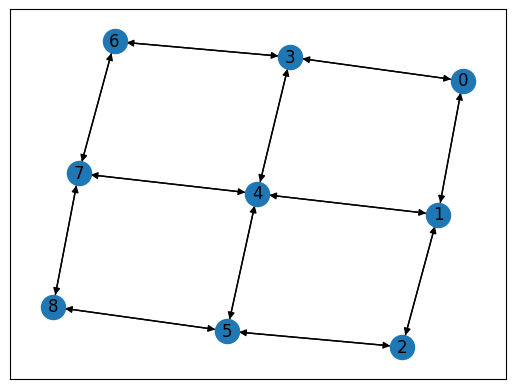

[1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1]


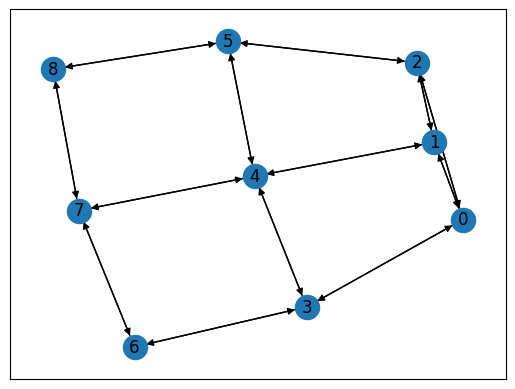

In [25]:
def chromosomeMutation( chromosome ):
  index = np.random.choice( len(chromosome ) )
  chromosomeMutated = list( chromosome )
  chromosomeMutated[index] = 1 - chromosomeMutated[index]
  return tuple(chromosomeMutated)



adjacencyMatrix = np.array( [[0, 1, 0, 1, 0, 0, 0, 0, 0],
                             [1, 0, 1, 0, 1, 0, 0, 0, 0],                              
                             [0, 1, 0, 0, 0, 1, 0, 0, 0],
                             [1, 0, 0, 0, 1, 0, 1, 0, 0],
                             [0, 1, 0, 1, 0, 1, 0, 1, 0],
                             [0, 0, 1, 0, 1, 0, 0, 0, 1],
                             [0, 0, 0, 1, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 1, 0, 1, 0, 1],
                             [0, 0, 0, 0, 0, 1, 0, 1, 0]] )

graph = mappingAdjacencyMatrixToGraph( adjacencyMatrix )
chromosome = mappingAdjacencyMatrixToChromosome( adjacencyMatrix )

nx.draw_networkx( graph, with_labels=True )
plt.show()
print( chromosome )

chromosomeMutated = chromosomeMutation( chromosome )

adjacencyMatrix = mappingChrosomeToAdjacencyMatrix( 9, chromosomeMutated  )
graph = mappingAdjacencyMatrixToGraph( adjacencyMatrix )
nx.draw_networkx( graph, with_labels=True )
plt.show()

###Prueba

In [26]:

from networkx.algorithms import distance_measures
from networkx.algorithms.shortest_paths.dense import floyd_warshall_numpy
from networkx.linalg.graphmatrix import adjacency_matrix

def draw_graph(nodes, edge_labels):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edge_labels)
    node_positions = nx.spring_layout(G)

    nx.draw_networkx(G, with_labels=True, node_size=500, pos=node_positions, node_color='pink', edge_color='black')
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_labels, font_color='red')
  

def create_adj_matrix( nodes, edge_labels ):
    adj_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

    for u, v in edge_labels.copy().keys():
      edge_labels[(v,u)] = edge_labels[ (u,v)] if (v,u) not in edge_labels else edge_labels[(v,u)] 
    
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if (u, v) in edge_labels:
                adj_matrix[i][j] = 1            
    return adj_matrix

    
def create_tdg_matrix(nodes, edge_labels):
    tdg_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

    for u, v in edge_labels.copy().keys():
      edge_labels[(v,u)] = edge_labels[ (u,v)] if (v,u) not in edge_labels else edge_labels[(v,u)] 
    
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if (u, v) in edge_labels:
                tdg_matrix[i][j] = int(edge_labels.get((u, v), 0))
                
    return tdg_matrix

def floyd_warshall( adj_matrix):
  numberOfNodes = adj_matrix.shape[0]
  distanceMatrix = np.copy(adj_matrix)
  distanceMatrix = distanceMatrix.astype(float)
  distanceMatrix[distanceMatrix == 0] = np.inf

  for k in range( numberOfNodes ):
    for i in range( numberOfNodes ):
      for j in range( numberOfNodes ):
        if i==j:
          distanceMatrix[i,j] = 0
        else:
          distanceMatrix[i,j] = min( distanceMatrix[i, j], distanceMatrix[i, k] + distanceMatrix[k, j] )

  return distanceMatrix      


def create_hop_matrix( adj_matrix):
    return floyd_warshall( adj_matrix )

def averageHops( hop_matrix ):
   return np.sum( hop_matrix )/np.count_nonzero( hop_matrix )

def getEdgesFromAdjacencyMatrix( nodes, adjacencyMatrix ):
  edgeLabels = {}
  for i, u in enumerate( nodes ):
    for j, v in enumerate( nodes ):
      if adjacencyMatrix[i][j] != 0:
        edgeLabels[ (u,v) ] = adjacencyMatrix[i][j]
  return edgeLabels     

def getNodesFromAdjacencyMatrix( adjacencyMatrix ):   
  numberOfNodes = adjacencyMatrix.shape[0]
  nodes = ['C{}'.format(index) for index in range(1, numberOfNodes+1)]
  return nodes





#### Prueba

['C1', 'C2', 'C3', 'C4', 'C5']
{('C1', 'C2'): 14, ('C1', 'C3'): 20, ('C1', 'C4'): 6, ('C2', 'C1'): 14, ('C2', 'C3'): 76, ('C3', 'C1'): 20, ('C3', 'C2'): 76, ('C3', 'C5'): 15, ('C4', 'C1'): 6, ('C4', 'C5'): 34, ('C5', 'C3'): 15, ('C5', 'C4'): 34}
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
[[ 0 14 20  6  0]
 [14  0 76  0  0]
 [20 76  0  0 15]
 [ 6  0  0  0 34]
 [ 0  0 15 34  0]]
[[0. 1. 1. 1. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 2. 1.]
 [1. 2. 2. 0. 1.]
 [2. 2. 1. 1. 0.]]


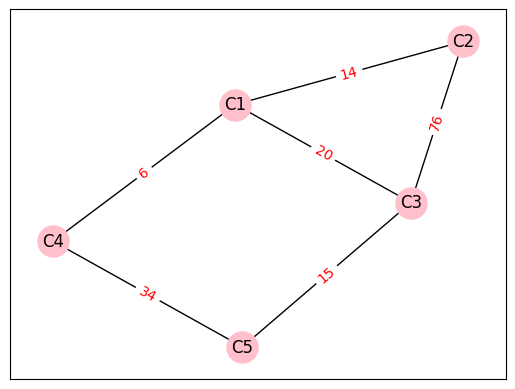

In [27]:
nodes = ['C{}'.format(index) for index in range(1,6)]
edge_labels = {('C1','C2'):14,('C1','C3'):20,('C2','C3'):76,('C1','C4'):6,('C4','C5'):34,('C5','C3'):15}

draw_graph( nodes, edge_labels )
adj_matrix = create_adj_matrix( nodes, edge_labels )
tdg_matrix = create_tdg_matrix( nodes, edge_labels )
hop_matrix = create_hop_matrix( adj_matrix  )
averageHop_matrix = averageHops(hop_matrix)

nodes = getNodesFromAdjacencyMatrix( adj_matrix )
edgeLabels = getEdgesFromAdjacencyMatrix( nodes, tdg_matrix ) 
print( nodes )
print( edgeLabels )

print( adj_matrix )
print( tdg_matrix )
print( hop_matrix )





[1 1 1 0 1 0 0 0 1 1]
[1 1 1 0 1 0 0 1 1 1]
[14.0, 6.0, 6.0]
[6.0, 14.0, 14.0]
[20.0, 15.0, 15.0]
[76.0, 15.0, 15.0]
[15.0, 20.0, 20.0]
[15.0, 76.0, 76.0]
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [1 0 1 0 1]
 [0 0 1 1 0]]
[[0. 1. 1. 1. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 1. 1.]
 [1. 2. 1. 0. 1.]
 [2. 2. 1. 1. 0.]]
[[ 0. 14. 20.  6.  0.]
 [14.  0. 76.  0.  0.]
 [20. 76.  0.  0. 15.]
 [ 6.  0.  0.  0. 34.]
 [ 0.  0. 15. 34.  0.]]
['C1', 'C2', 'C3', 'C4', 'C5']
{('C1', 'C2'): 1, ('C1', 'C3'): 1, ('C1', 'C4'): 1, ('C2', 'C1'): 1, ('C2', 'C3'): 1, ('C3', 'C1'): 1, ('C3', 'C2'): 1, ('C3', 'C4'): 1, ('C3', 'C5'): 1, ('C4', 'C1'): 1, ('C4', 'C3'): 1, ('C4', 'C5'): 1, ('C5', 'C3'): 1, ('C5', 'C4'): 1}


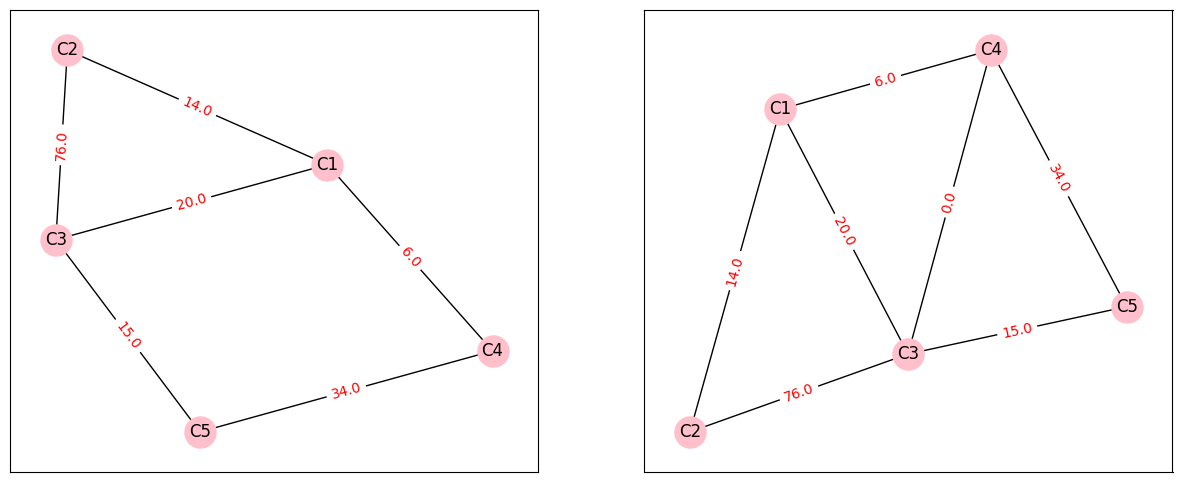

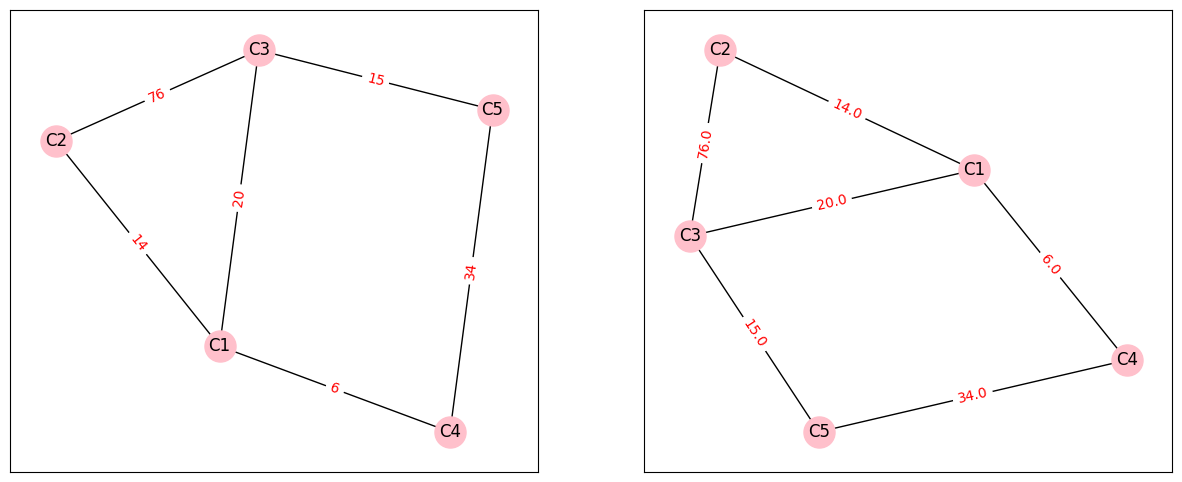

In [29]:
chromosome = mappingAdjacencyMatrixToChromosome( adj_matrix )
print( '' )
print( chromosome )

chromosomeMutated = chromosomeMutation( chromosome )
print( np.array(chromosomeMutated) )


adj_matrixMutated = mappingChrosomeToAdjacencyMatrix( 5, chromosomeMutated )
hop_matrixMutated = create_hop_matrix( adj_matrixMutated  )
tdg_matrixMutated = create_tdg_matrix_mutated( adj_matrix, adj_matrixMutated, hop_matrixMutated, tdg_matrix )

print( adj_matrixMutated )
print( hop_matrixMutated )
print( tdg_matrixMutated )



nodes = getNodesFromAdjacencyMatrix( adj_matrixMutated )
edgeLabels = getEdgesFromAdjacencyMatrix( nodes, adj_matrixMutated ) 
print( nodes )
print( edgeLabels )

nodes = getNodesFromAdjacencyMatrix( adj_matrixMutated )
edgeLabels = getEdgesFromAdjacencyMatrix( nodes, tdg_matrixMutated ) 

def getEdgesMutated( nodes, adj_matrixMutated, tdg_matrixMutated ):
  edgeLabels = {}
  for i, u in enumerate( nodes ):
    for j, v in enumerate( nodes ):
      if adj_matrixMutated[i][j] != 0:
        edgeLabels[ (u,v) ] = tdg_matrixMutated[i][j]
  return edgeLabels

plt.subplots( 1, 2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
draw_graph( nodes, edgeLabels )
plt.subplot( 1, 2, 2 )
draw_graph( nodes, getEdgesMutated( nodes, adj_matrixMutated, tdg_matrixMutated ) ) 

plt.subplots( 1, 2, figsize=(15,6) )
plt.subplot( 1, 2, 1)
draw_graph( nodes, edge_labels )
plt.subplot( 1, 2, 2 )
draw_graph( nodes, edgeLabels )

###### Comparación


adj_matrix
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
-------------------
adj_matrix update
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [1 0 1 0 1]
 [0 0 1 1 0]]
hop_matrix
[[0. 1. 1. 1. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 2. 1.]
 [1. 2. 2. 0. 1.]
 [2. 2. 1. 1. 0.]]
-------------------
hop_matrix update
[[0. 1. 1. 1. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 1. 1.]
 [1. 2. 1. 0. 1.]
 [2. 2. 1. 1. 0.]]
tdg_matrix
[[ 0 14 20  6  0]
 [14  0 76  0  0]
 [20 76  0  0 15]
 [ 6  0  0  0 34]
 [ 0  0 15 34  0]]
-------------------
tdg_matrix update
[[ 0. 14. 20.  6.  0.]
 [14.  0. 76.  0.  0.]
 [20. 76.  0.  0. 15.]
 [ 6.  0.  0.  0. 34.]
 [ 0.  0. 15. 34.  0.]]


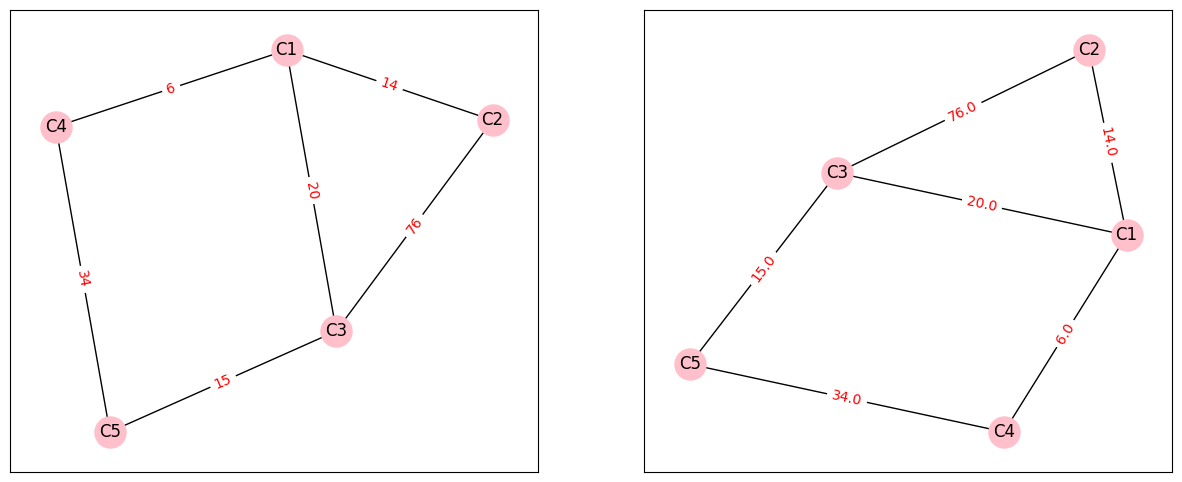

In [30]:
plt.subplots( 1, 2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
draw_graph( nodes, edge_labels )
plt.subplot( 1, 2, 2 )
draw_graph( nodes, edgeLabels )



print( '='*30 )
print( 'adj_matrix')
print( adj_matrix )
print( '-'*19 )
print( 'adj_matrix update')
print( adj_matrixMutated )
print( '='*30 )

print( '='*30 )
print( 'hop_matrix')
print( hop_matrix )
print( '-'*19 )
print( 'hop_matrix update')
print( hop_matrixMutated )
print( '='*30 )

print( '='*30 )
print( 'tdg_matrix')
print( tdg_matrix )
print( '-'*19 )
print( 'tdg_matrix update')
print( tdg_matrixMutated )
print( '='*30 )

## Implementación

### Clase DirectGraph

In [31]:
class DirectGraph(  ):
  def __init__( self, nodes, labeledEdges ):
    self.nodes        = self.mappingNodes( nodes )     
    self.labeledEdges = self.mappingEdges( labeledEdges )
    self.adj_matrix   = self.mappingAdjMatrix(  nodes, labeledEdges )


  def mappingAdjMatrix( self, nodes, labeledEdges ):
    adj_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

    for u, v in labeledEdges.copy().keys():
      self.labeledEdges[(v,u)] =  self.labeledEdges[ (u,v)] if (v,u) not in  self.labeledEdges else  self.labeledEdges[(v,u)] 
    
    for i, u in enumerate( nodes ):
        for j, v in enumerate( nodes ):
            if (u, v) in  self.labeledEdges:
                adj_matrix[i][j] = 1            
    return adj_matrix    

  def mappingNodes( self, nodes ):
    return nodes

  def mappingEdges( self, labeledEdges ):
    return labeledEdges


### Clase Chromosome

In [32]:
class Chromosome( ):
  def __init__( self, chromosome ):
    self.chromosome   = chromosome
    self.matrixSize   = self.getMatrixSize()
    self.adj_matrix   = self.mappingAdjMatrix( )
    self.nodes        = self.mappingToNodes()
    self.labeledEdges = self.mappingToEdges()
    
  def getMatrixSize( self ):
    n = ( 1 + math.sqrt( 1+8*len(self.chromosome) ) ) / 2
    if n % 1 < 0.5:
      return math.floor( n )
    else:
      return math.ceil( n )

  def mappingAdjMatrix( self ):
    adj_matrix = np.zeros( (self.matrixSize, self.matrixSize), dtype=int )
    index = 0
    for row in range( self.matrixSize ):
      for col in range( row +  1, self.matrixSize ):
        adj_matrix[row, col] = self.chromosome[index]
        adj_matrix[col, row] = self.chromosome[index]
        index += 1
    return adj_matrix #mappingChrosomeToAdjacencyMatrix( 5, self.chromosome )

  def mappingToNodes( self ):
    numberOfNodes = self.adj_matrix.shape[0]
    nodes = ['C{}'.format(index) for index in range(1, numberOfNodes+1)]
    return nodes

  def mappingToEdges( self ):
    edgeLabels = {}
    for i, u in enumerate( nodes ):
      for j, v in enumerate( nodes ):
        if self.adj_matrix[i][j] != 0:
          edgeLabels[ (u,v) ] = self.adj_matrix[i][j]
    return edgeLabels 

### Clase CustomGraph

In [33]:

class CustomGraph( ):
  def __init__( self, infoGraph ):
    self.adj_matrix    = infoGraph.adj_matrix
    self.nodes         = infoGraph.nodes
    self.labeledEdges  = infoGraph.labeledEdges
    self.numberOfNodes = len( nodes )
    self.numberOfEdges = len( labeledEdges )

    self.tdg_matrix = self.mappingToTDGMatrix()
    self.hop_matrix = self.mappingToHopMatrix()
    self.chromosome = self.mappingToChromosome()

    self.averageHops = self.calculateAverageHops()
  
    self.nxGraph    = self.mappingToNXGraph()


  def mappingToNXGraph( self ):
    G = nx.Graph()
    G.add_nodes_from( self.nodes )
    G.add_edges_from( self.labeledEdges )
    return G

  def drawGraph( self ):
    node_positions = nx.spring_layout( self.nxGraph )
    nx.draw_networkx( self.nxGraph, with_labels=True, node_size=500, pos=node_positions, node_color='pink', edge_color='black' )
    nx.draw_networkx_edge_labels( self.nxGraph, pos=node_positions, edge_labels=edge_labels, font_color='red' )

  def mappingToAdjacencyMatrix( self ):
    adj_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

    for u, v in labeledEdges.copy().keys():
      self.labeledEdges[(v,u)] = self.labeledEdges[ (u,v)] if (v,u) not in self.labeledEdges else self.labeledEdges[(v,u)] 
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if (u, v) in edge_labels:
                adj_matrix[i][j] = 1
    return adj_matrix

  def mappingToTDGMatrix( self ):
    tdg_matrix = np.zeros( (self.numberOfNodes, self.numberOfNodes), dtype=int )
    
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if (u, v) in self.labeledEdges:
                tdg_matrix[i][j] = int(self.labeledEdges.get((u, v), 0))
                
    return tdg_matrix

  def mappingToHopMatrix( self ): 
    distanceMatrix = np.copy(self.adj_matrix)
    distanceMatrix = distanceMatrix.astype(float)
    distanceMatrix[distanceMatrix == 0] = np.inf

    for k in range( self.numberOfNodes ):
      for i in range( self.numberOfNodes ):
        for j in range(self.numberOfNodes ):
          if i==j:
            distanceMatrix[i,j] = 0
          else:
            distanceMatrix[i,j] = min( distanceMatrix[i, j], distanceMatrix[i, k] + distanceMatrix[k, j] )
    return distanceMatrix  

  def mappingToChromosome( self ):
    triangularMatrixWithoutDiagonalIndices = np.triu_indices( n=self.adj_matrix.shape[0], k=1 )
    triangularMatrixWithoutDiagonalValues = self.adj_matrix[triangularMatrixWithoutDiagonalIndices]
    return np.array( triangularMatrixWithoutDiagonalValues )

  def calculateAverageHops( self ):
    return np.sum( self.hop_matrix )/np.count_nonzero( self.hop_matrix )


### Pruebas

In [34]:
nodes = ['C{}'.format(index) for index in range(1,6)]
#labeledEdges = {('C1','C2'):14,('C1','C3'):20,('C1','C4'):6,('C2','C3'):76,('C3','C5'):15,('C4','C5'):34}
labeledEdges = {('C1','C2'):1,('C1','C3'):1,('C1','C4'):1,('C2','C3'):1,('C3','C5'):1,('C4','C5'):1}

print( "Graph to Chromosome"  )
directGraph = DirectGraph( nodes, labeledEdges )
customGraph = CustomGraph( directGraph )

print( "Chromosome to Graph" )
chromosome = Chromosome( customGraph.chromosome )
chromosomeGraph = CustomGraph( chromosome )

Graph to Chromosome
Chromosome to Graph


#### Comprobaciones

Graph to Chromosome
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
[[0. 1. 1. 1. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 2. 1.]
 [1. 2. 2. 0. 1.]
 [2. 2. 1. 1. 0.]]
[1 1 1 0 1 0 0 0 1 1]
Chromosome to Graph
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
[[0. 1. 1. 1. 2.]
 [1. 0. 1. 2. 2.]
 [1. 1. 0. 2. 1.]
 [1. 2. 2. 0. 1.]
 [2. 2. 1. 1. 0.]]
[1 1 1 0 1 0 0 0 1 1]
Differences
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0]
['C1', 'C2', 'C3', 'C4', 'C5']
['C1', 'C2', 'C3', 'C4', 'C5']
{('C1', 'C2'): 1, ('C1', 'C3'): 1, ('C1', 'C4'): 1, ('C2', 'C3'): 1, ('C3', 'C5'): 1, ('C4', 'C5'): 1, ('C2', 'C1'): 1, ('C3', 'C1'): 1, ('C4', 'C1'): 

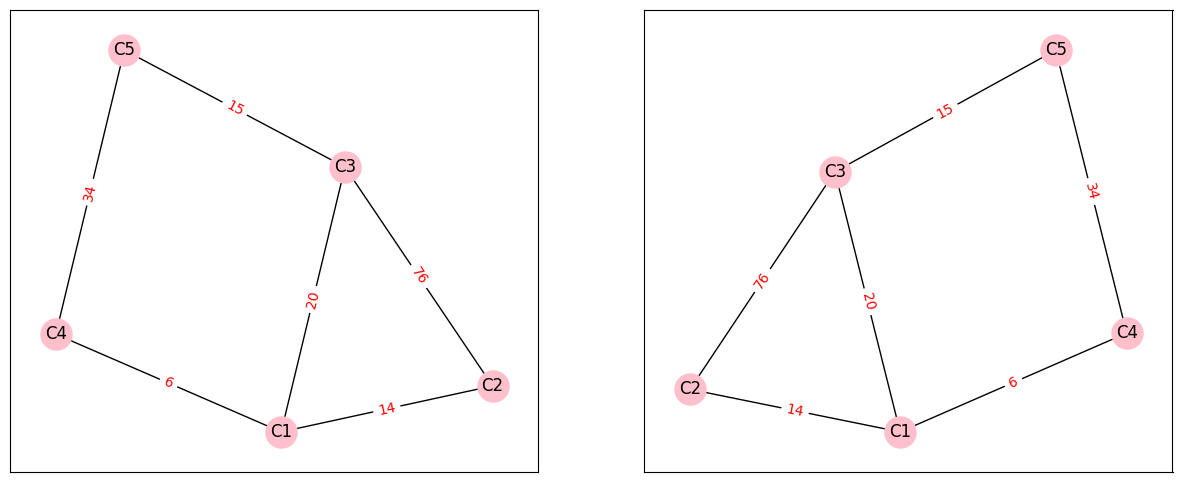

In [35]:
print( "Graph to Chromosome"  )
print( customGraph.tdg_matrix )
print( customGraph.adj_matrix )
print( customGraph.hop_matrix )
print( customGraph.chromosome )

print( "Chromosome to Graph" )
print( chromosomeGraph.tdg_matrix )
print( chromosomeGraph.adj_matrix )
print( chromosomeGraph.hop_matrix )
print( chromosomeGraph.chromosome )

print( "Differences"  )
print( np.abs(customGraph.tdg_matrix - chromosomeGraph.tdg_matrix) )
print( np.abs(customGraph.adj_matrix - chromosomeGraph.adj_matrix) )
print( np.abs(customGraph.hop_matrix - chromosomeGraph.hop_matrix) )
print( np.abs(customGraph.chromosome - chromosomeGraph.chromosome) )

print( customGraph.nodes )
print( chromosomeGraph.nodes )

print( customGraph.labeledEdges )
print( chromosomeGraph.labeledEdges )


plt.subplots( 1, 2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
customGraph.drawGraph()
plt.subplot( 1, 2, 2 )
chromosomeGraph.drawGraph()

In [37]:
def functionFitness( x ):  
  return  - np.abs( np.sin(x) - 0.5 * x ) # Max in 1.89, 0.81

def functionDecode( self ):
  n = self.chromosomeSize 
  a=1
  b=3
  x=[]
  for s in self.population:
    bin_to_int = np.array( [int(j) << i for i,j in enumerate(s[::-1])] ).sum()
    int_to_x   = a + bin_to_int * (b - a) / (2**n - 1)
    x.append( int_to_x )
  self.populationValue = np.array(x)  
  return np.array(x)



GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
GA.plotResult( GA )

TypeError: ignored

# Optimización por Algoritmos Genéticos

## Descripción del Grafo

In [38]:
nodes = ['C{}'.format(index) for index in range(1,6)]
labeledEdges = {('C1','C2'):14,('C1','C3'):20,('C2','C3'):76,('C1','C4'):6,('C4','C5'):34,('C5','C3'):15}

descriptionApplicationGraph = DirectGraph( nodes, labeledEdges )
applicationGraph = CustomGraph( descriptionApplicationGraph )

def plotResult( self ):
  None

## Optimización Delay

**Funcion objetivo Delay a minimizar**
$$D_{NoC} = u (t_{a}+t_{r}) + (u+1) t_{l} + \frac{N_{P}}{N_{C}}t_{l}$$

Lista de símbolos

$u$: Average Internode Distance

$t_{a}$: Router Arbitration Delay

$t_{r}$: Propagation Delay 

$t_{l}$: Link Propagation Delay

$N_{P}$: Number of bits per packet 

$N_{C}$: Channel width 

### Pruebas Métodos

In [39]:
def functionFitnessAverageHopsDisplay( GA ):
  print( GA.population )
  fitnessScores = np.zeros(len(GA.population))
  for index in range( len(GA.population) ):
    print( '='*68)
    fitnessScores[index] = CustomGraph(Chromosome( GA.population[index] )).averageHops
    print( '-'*30)
    print( Chromosome( GA.population[index] ).chromosome )
    print( '-'*30)
    print( CustomGraph(Chromosome( GA.population[index] )).adj_matrix )
    print( '-'*30)
    print( CustomGraph(Chromosome( GA.population[index] )).hop_matrix )
    print( '-'*30)
    print( fitnessScores[index] )
    print( '='*68)
  return fitnessScores

def functionFitnessAverageHops( GA ):
  fitnessScores = np.zeros(len(GA.population))
  for index in range( len(GA.population) ):
    fitnessScores[index] = CustomGraph(Chromosome( GA.population[index] )).averageHops
  return fitnessScores

def functionDecodeHopAverageHops( GA ):
  return None


def OptimizationTopology( ):
  GA.solve()
  GA.printResult()

  print( chromosomeGraph.hop_matrix)
  print( chromosomeGraph.averageHops )


  functionFitnessAverageHops( GA )

In [40]:
OptimizationTopology( )

TypeError: ignored

In [41]:
GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=1, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#

def OptimizationTopology( ):
  GA.solve()
  GA.printResult()
  GA.plotResult( GA )

  
  chromosome = Chromosome( GA.bestCandidateOfGeneration[-1] )
  chromosomeGraph = CustomGraph( chromosome )

  
  print( GA.bestCandidateOfGeneration[-1] ) 
  print( chromosome.chromosome )
  print( chromosomeGraph.adj_matrix )
 
  plt.subplots( 1,2, figsize=(15,6) )
  plt.subplot( 1, 2, 1 )
  customGraph.drawGraph()
  plt.subplot( 1, 2, 2 )
  chromosomeGraph.drawGraph()


In [ ]:
OptimizationTopology()

### Simplificación #1

#### Función Fitness

$$ D_{NoC} = u$$

Donde $\mu = $ average hops in the network

In [105]:
def functionFitness( x ):  
  return  np.sum(  CustomGraph(Chromosome( x )).hop_matrix )

In [106]:
def calculateFitness( GA ):
  fitnessScores = np.zeros( len(GA.population) )
  for index in range (len(GA.population) ):
    fitnessScores[index] = functionFitness( GA.population[index] )
  return - fitnessScores

#### Optimización

[-28. -inf -34. -28. -32. -28. -34. -34. -34. -24.]
Generation 0 max fitness -24.0000 at 
#1	[0 1 1 1 0 1 0 1 0 1] fitness: -28.0000 
#2	[0 1 0 0 0 0 1 0 0 1] fitness: -inf 
#3	[1 1 0 1 0 0 1 1 0 0] fitness: -34.0000 
#4	[1 1 0 1 0 1 1 1 0 0] fitness: -28.0000 
#5	[1 1 0 1 0 0 0 1 0 1] fitness: -32.0000 
#6	[1 1 0 1 0 1 0 1 0 1] fitness: -28.0000 
#7	[1 0 1 0 1 0 1 0 1 0] fitness: -34.0000 
#8	[0 1 0 1 0 1 0 0 1 1] fitness: -34.0000 
#9	[1 1 1 0 0 1 0 0 1 0] fitness: -34.0000 
#10	[1 1 0 1 1 1 0 1 1 1] fitness: -24.0000 
Average fitness: -inf

[-20. -20. -20. -22. -20. -20. -20.]
Generation 100 max fitness -20.0000 at 
#1	[1 1 1 1 1 1 1 1 1 1] fitness: -20.0000 
#2	[1 1 1 1 1 1 1 1 1 1] fitness: -20.0000 
#3	[1 1 1 1 1 1 1 1 1 1] fitness: -20.0000 
#4	[1 0 1 1 1 1 1 1 1 1] fitness: -22.0000 
#5	[1 1 1 1 1 1 1 1 1 1] fitness: -20.0000 
#6	[1 1 1 1 1 1 1 1 1 1] fitness: -20.0000 
#7	[1 1 1 1 1 1 1 1 1 1] fitness: -20.0000 
Average fitness: -20.2857



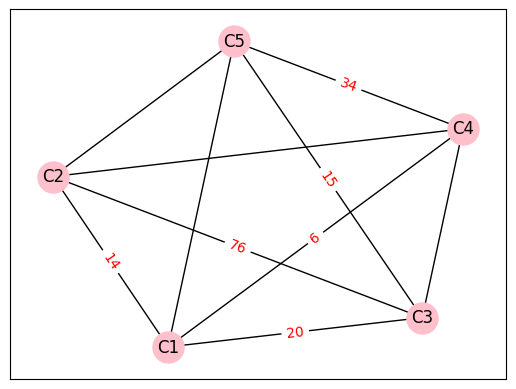

In [111]:
def plotResult( self ):
  None

GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
customOptimizatedChromosome = Chromosome( GA.bestCandidateOfGeneration[-1] )
customOptimizatedGraph = CustomGraph( customOptimizatedChromosome )
customOptimizatedGraph.drawGraph()
GA.plotResult( GA )

#### Resultados

In [ ]:
plt.subplots( 1, 2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
applicationGraph.drawGraph()
plt.subplot( 1, 2, 2 )
customOptimizatedGraph.drawGraph( )

### Simplificación #2

#### Función Fitness


$$ D_{NoC} = \mu $$ 

Donde $ \mu = \frac{ \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{ij} c_{ij} } { \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{ij} } $

In [ ]:
def functionFitness( x ):
  return np.sum( CustomGraph(Chromosome( x )).tdg_matrix * CustomGraph(Chromosome( x )).hop_matrix ) / np.sum(  CustomGraph(Chromosome( x )).tdg_matrix )

In [ ]:
def calculateFitness( GA ):
  fitnessScores = np.zeros( len(GA.population) )
  for index in range (len(GA.population)):
    fitnessScores[index] = functionFitness( GA.population[index] )
  return - fitnessScores

#### Optimización

In [ ]:
def plotResult( self ):
  None

GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
customOptimizatedChromosome = Chromosome( GA.bestCandidateOfGeneration[-1] )
customOptimizatedGraph = CustomGraph( customOptimizatedChromosome )
customOptimizatedGraph.drawGraph()
GA.plotResult( GA )

#### Resultados

In [ ]:
plt.subplots( 1, 2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
applicationGraph.drawGraph()
plt.subplot( 1, 2, 2 )
customOptimizatedGraph.drawGraph( )

### Simplificación #3

#### Función Fitness

#### Optimización

In [ ]:
def functionFitness( x ):
  return - functionFitness( GA )

#### Resultados

In [ ]:
plt.subplots( 1,2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
customGraph.drawGraph()
#nx.draw( customGraph.nxGraph, with_labels=True )
plt.subplot( 1, 2, 2 )
customOptimizatedGraph.drawGraph()
#nx.draw( customOptimizatedGraph.nxGraph, with_labels=True )

## Optimización Area

NoC area consist of the area of its routers and links.

-Each port has an equal buffer size and consist of two channel of channel for packets reception and transmission, respectively.



**Router Area:**

$A_{R}=\sum_{i=1}^{N}{ A_{ R_{i} } }$

Donde:


*   $N$: number of routers in the network, witch is equal to the number of cores in the application.
*   $A_{R_{i}}$ : Area of router $i$

**Link Area**
The link are adepends on number if wires per each link, the wire length and width, and the spacing between wires.

$$A_{L} = N_{L} * (N_{c}*(w_{}+s_{w})+s_{w})*l_{l}$$

*   $N_{L}$: Number of links within the network
*   $N_{C}$: Channel width  (Number channel)
*   $w_{w}$: Wire width
*   $s_{w}$: Inter-wires spacing
*   $l_{l}$: Wire length  for global interconnects

**Total NoC Area** 

$$A_{NoC} = A_{R} + A_{L}$$

**Simplificando el modelo**

Se toma en cuenta sólo el parámetro $N_{L}$


$$A_{NoC}= A_{R} + A_{L}$$

Donde:

$A_{R}=\sum_{i=1}^{N}{ A_{ R_{i} } }$

$A_{L} = N_{L}$




In [ ]:
def functionFitnessArea( applicationGraph ):
  areaRouterTotal = len(applicationGraph.nodes)
  areaLinkTotal   = np.sum( np.sum(applicationGraph.adj_matrix, axis=0) )
  areaNoC = areaRouterTotal + areaLinkTotal
  return areaNoC

In [ ]:
print( 'Number of link per node: ', np.sum(applicationGraph.adj_matrix, axis=0) )
print( f'Area Noc Total: {functionFitnessArea( applicationGraph ):0.2f}'  )

### Simplificación #1



Caso Trivial, la menor area es donde no existe aristas (links) entre los nodos

#### Función Fitness

In [91]:
def functionFitness( x ):
  return 5 + np.sum( np.sum( CustomGraph( Chromosome( x ) ).adj_matrix), axis=0 )

In [92]:
def calculateFitness( GA ):
  fitnessScores = np.zeros( len(GA.population) )
  for index in range( len( GA.population ) ):
    fitnessScores[index] = functionFitness( GA.population[index] )
  return - fitnessScores

#### Optimización

In [93]:
def plotResult( self ):
  None

GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
customOptimizatedChromosome = Chromosome( GA.bestCandidateOfGeneration[-1] )
customOptimizatedGraph = CustomGraph( customOptimizatedChromosome )
customOptimizatedGraph.drawGraph()
GA.plotResult( GA )

[-17. -11. -15. -17. -15. -17. -15. -15. -15. -21.]
Generation 0 max fitness -11.0000 at 


TypeError: ignored

#### Resultados

In [ ]:
plt.subplots( 1,2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
customGraph.drawGraph()
#nx.draw( customGraph.nxGraph, with_labels=True )
plt.subplot( 1, 2, 2 )
customOptimizatedGraph.drawGraph()
#nx.draw( customOptimizatedGraph.nxGraph, with_labels=True )

### Simplificación #2

* Restricción de puertos

In [ ]:
def isReachable( hop_matrix ):
  numberOfNodes = hop_matrix.shape[0]
  for index in range( numberOfNodes ):
    if np.sum(hop_matrix[index, :] ) == np.inf:
        return 100
  return 1      

In [ ]:
def restriction( x ):
  return isReachable( CustomGraph( Chromosome( x ) ).hop_matrix ) 

#### Función Fitness

In [ ]:
def functionFitness( x ):
  return 5 + np.sum( np.sum( CustomGraph( Chromosome( x ) ).adj_matrix), axis=0 )

In [ ]:
def calculateFitness( GA ):
  fitnessScores = np.zeros( len(GA.population) )
  for index in range (len(GA.population)):
    fitnessScores[index] = restriction( GA.population[index] ) * functionFitness( GA.population[index] )
  return - fitnessScores

#### Optimización

In [ ]:
def plotResult( self ):
  None

GA = GeneticAlgorithm( populationSize=10, chromosomeSize=10, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
customOptimizatedChromosome = Chromosome( GA.bestCandidateOfGeneration[-1] )
customOptimizatedGraph = CustomGraph( customOptimizatedChromosome )
customOptimizatedGraph.drawGraph()
GA.plotResult( GA )

#### Resultados

In [ ]:
plt.subplots( 1,2, figsize=(15,6) )
plt.subplot( 1, 2, 1 )
customGraph.drawGraph()
#nx.draw( customGraph.nxGraph, with_labels=True )
plt.subplot( 1, 2, 2 )
customOptimizatedGraph.drawGraph()
#nx.draw( customOptimizatedGraph.nxGraph, with_labels=True )

### Simplificación #3

#### Función Fitness

#### Optimización

#### Resultados

# Ejemplo de optimización de grafos
Traffic Distributed Graph Matrix


In [ ]:
matrixTDG = np.zeros( (18,18) )
matrixTDG[0][11]  = matrixTDG[11][0]  =  330.50
matrixTDG[0][15]  = matrixTDG[15][0]  =   35.86
matrixTDG[0][16]  = matrixTDG[16][0]  =  198.80
matrixTDG[0][17]  = matrixTDG[17][0]  =  529.30
matrixTDG[1][9]   = matrixTDG[9][1]   =  330.50
matrixTDG[1][17]  = matrixTDG[17][1]  =  529.30
matrixTDG[2][11]  = matrixTDG[11][2]  =  371.25
matrixTDG[2][16]  = matrixTDG[16][2]  =  137.25
matrixTDG[3][10]  = matrixTDG[10][3]  =    1.40
matrixTDG[3][15]  = matrixTDG[15][3]  =   37.78
matrixTDG[4][16]  = matrixTDG[16][4]  =  331.80
matrixTDG[5][9]   = matrixTDG[9][5]   =  275.80
matrixTDG[5][16]  = matrixTDG[16][5]  =  331.80
matrixTDG[6][14]  = matrixTDG[14][6]  =   68.99
matrixTDG[6][15]  = matrixTDG[6][15]  =  207.00
matrixTDG[7][10]  = matrixTDG[10][7]  =    6.26
matrixTDG[7][12]  = matrixTDG[12][7]  =    1.02
matrixTDG[7][15]  = matrixTDG[15][7]  =  276.00
matrixTDG[8][10]  = matrixTDG[10][8]  =  371.25
matrixTDG[8][11]  = matrixTDG[11][8]  =    1.92
matrixTDG[8][13]  = matrixTDG[13][8]  = 1105.67
matrixTDG[8][15]  = matrixTDG[15][8]  =    1.92
matrixTDG[8][16]  = matrixTDG[16][8]  =  198.80
matrixTDG[9][10]  = matrixTDG[10][9]  =    7.46
matrixTDG[9][12]  = matrixTDG[12][9]  =    1.02
matrixTDG[9][14]  = matrixTDG[14][9]  =    6.25
matrixTDG[10][14] = matrixTDG[14][10] =   72.50
matrixTDG[11][13] = matrixTDG[13][11] =    1.97

labeledEdges = { (rowIndex, colIndex): matrixTDG[rowIndex][colIndex] for rowIndex, colIndex in graph.edges()}
positionEdgeLabels = { (rowIndex, colIndex): (colIndex, rowIndex) for rowIndex, colIndex in graph.edges()}

nodes = ['C{}'.format(index) for index in range(1,19)]
labeledEdges = {( 'C1','C12'):330.50,( 'C1','C13'): 35.86,(  'C1','C17'): 192.80,('C1','C18'):529.30,
                ( 'C2','C10'):330.50,( 'C2','C18'):529.30,
                ( 'C3','C12'):371.25,( 'C3','C17'):137.25,
                ( 'C4','C11'):  1.40,( 'C4','C16'): 37.78,
                ( 'C5','C17'):331.80,
                ( 'C6','C10'):275.80,( 'C6','C17'):331.80,
                ( 'C7','C13'): 68.99,( 'C7','C14'):207.00,
                ( 'C8','C11'):  6.26,( 'C8','C13'):  1.02,( 'C8','C16'): 276.00,
                ( 'C9','C12'):371.25,( 'C9','C12'):  1.92,( 'C9','C14'):1105.67,('C9','C16'): 1.92,('C9','C17'):198.80,
                ('C10','C11'):  7.46,('C10','C13'):  1.02,('C10','C15'):   6.25,
                ('C11','C15'): 72.50,
                ('C12','C14'):  1.97}

applicationCores = DirectGraph( nodes, labeledEdges )
applicationCoresGraph = CustomGraph( applicationCores )
nx.draw_networkx( applicationCoresGraph.nxGraph, with_labels=True, pos=nx.spiral_layout(applicationCoresGraph.nxGraph) )
#nx.draw_networkx_edge_labels( graph, pos=positionEdgeLabels, edge_labels=edgeLabels )




In [ ]:
def functionFitness( x ):  
  return  - np.abs( np.sin(x) - 0.5 * x ) # Max in 1.89, 0.81


def functionDecode( self ):
  n = self.chromosomeSize 
  a=1
  b=3
  x=[]
  for s in self.population:
    bin_to_int = np.array( [int(j) << i for i,j in enumerate(s[::-1])] ).sum()
    int_to_x   = a + bin_to_int * (b - a) / (2**n - 1)
    x.append( int_to_x )
  self.populationValue = np.array(x)  
  return np.array(x)

def plotResult( self ):
    xval = np.arange( 1, 3, 0.01 )
    yval = functionFitness( xval )
    plt.figure( figsize=(10,5) )

    plt.subplot( 141 )
    plt.plot( xval, yval, color='m', linewidth=4 )
    plt.scatter( xval, yval, color='m' )
    plt.xlim( (1,3) )
    plt.xlabel( '$x$' )
    plt.ylabel( '$f(x) = -|sin(x) - 0.5x|$' )
    plt.title( 'Population at Iteration ' + str(3) + '\n' + 'Number of Individuals: ' + str(self.populationSize) )

    xval = np.arange( 0, self.numberMaximumIterations, 1 )
    yval = self.bestFitnessOfGeneration

    plt.subplot( 142 )
    plt.plot( xval, yval, color='c', linewidth=4 )
    plt.xlim( 0 )
    plt.xlabel( 'Iteration' )
    plt.ylabel( 'Best Fitness' )
    plt.title( 'Best Fitness vs Iteration' + '\n' + 'number of Individuals: ' + str( self.populationSize ) )

    plt.subplot( 143 )
    plt.plot( self.bestFitnessOfGeneration, color='c', linewidth=4 )
    plt.xlim( 0 )
    plt.xlabel( 'Iteration' )
    plt.ylabel( 'Best Fitness' )
    plt.title( 'Best Fitness vs Iteration' + '\n' + 'number of Individuals: ' + str( self.populationSize ) )
  
    plt.subplot( 144 )
    plt.plot( self.bestFitnessOfGeneration, color='c', linewidth=4 )
    plt.xlim( 0 )
    plt.xlabel( 'Iteration' )
    plt.ylabel( 'Error' )
    plt.title( 'Best Fitness vs Iteration' + '\n' + 'number of Individuals: ' + str( self.populationSize ) )

    plt.tight_layout()
    plt.show()

GA = GeneticAlgorithm( populationSize=10, chromosomeSize=18, 
                       mutationType='bitstring', crossoverType='uniform', selectionType='ranking',
                       functionDecode = functionDecode,
                       calculateFitness = calculateFitness,
                       plotResult = plotResult,
                       numberMaximumIterations=100, epsilon = 0.001,
                       randomState = 69, geneLimits = None )#
GA.solve()
GA.printResult()
print( GA.bestCandidateOfGeneration[-1] )
optimizatedApplicationCores = Chromosome( GA.bestCandidateOfGeneration[-1] )
print(  optimizatedApplicationCores.matrixSize )
optimizatedApplicationCoresGraph = CustomGraph( optimizatedApplicationCores )
GA.plotResult( GA )


# Standard Graphs: Optimización por Algoritmos Genéticos

## Application Cores Graph